## Bollinguer Bands algo

1. Obtain candlestick data for a specific crypto.
2. The function would be passing a single crypto (or maybe an array?)
3. Perform algorithmic operations 
    - Price is passing top band 2 or 3 times (buy position)
    - Price is going below bottom band 2 or 3 times (sell position)

In [83]:
# libraries
import urllib.request as r
import json
import pandas as pd
import numpy as np
import matplotlib as plt

In [84]:
# Get data for a single crypto e.g. BTT in BNB market
base = 'https://api.binance.com'
ticker24 = '/api/v1/ticker/24hr'
candlestick = '/api/v1/klines'
params = '?symbol=BTTBNB&interval=12h'
httpRes = r.urlopen(base + candlestick + params)
data = json.load(httpRes)

In [105]:
columns = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades','Taker buy base asset volume','Taker buy quote asset volume','ignore']
df = pd.DataFrame(data, columns=columns)
original_data = df;

In [108]:
# clean and parse data
dateFormat = '%d/%m/%Y'
df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
df['Close time'] = pd.to_datetime(df['Close time'], unit='ms')
df['Volume'] = pd.to_numeric(df['Volume'],errors='coerce')
df[['Open', 'High', 'Low', 'Close']] = df[['Open', 'High', 'Low', 'Close']].astype('float64')
# ohlc_df = df[['Open time', 'Open', 'High', 'Low', 'Close', 'Close time', 'Volume']]
# df[['Open time', 'Open', 'High', 'Low', 'Close', 'Close time', 'Volume']]

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,ignore
0,2019-01-31 00:00:00,0,0,0,0,"7,897,130,116",2019-01-31 11:59:59.999,653077.88002816,12678,3907632484.00000000,320196.96624736,0
1,2019-01-31 12:00:00,0,0,0,0,"4,906,464,379",2019-01-31 23:59:59.999,409349.37996545,13468,1537848736.00000000,129160.01537482,0
2,2019-02-01 00:00:00,0,0,0,0,"3,097,230,444",2019-02-01 11:59:59.999,234237.27880493,7533,1430577990.00000000,107671.28350865,0
3,2019-02-01 12:00:00,0,0,0,0,"1,018,049,874",2019-02-01 23:59:59.999,73924.15404878,3547,632465702.00000000,45910.48903380,0
4,2019-02-02 00:00:00,0,0,0,0,"1,261,517,899",2019-02-02 11:59:59.999,84365.99638228,3737,712093707.00000000,47429.28372592,0
5,2019-02-02 12:00:00,0,0,0,0,"1,038,508,052",2019-02-02 23:59:59.999,65883.46781811,3223,564071407.00000000,35820.65730949,0
6,2019-02-03 00:00:00,0,0,0,0,"1,154,197,244",2019-02-03 11:59:59.999,76179.78354903,3724,714316525.00000000,47214.85775729,0
7,2019-02-03 12:00:00,0,0,0,0,"4,305,114,577",2019-02-03 23:59:59.999,351587.97438574,12491,2187972041.00000000,179839.34813533,0
8,2019-02-04 00:00:00,0,0,0,0,"4,673,449,097",2019-02-04 11:59:59.999,472684.50945349,16540,2331083192.00000000,236913.14210290,0
9,2019-02-04 12:00:00,0,0,0,0,"4,746,576,591",2019-02-04 23:59:59.999,551676.28184842,17993,2407157748.00000000,276311.96352953,0


In [88]:
from matplotlib.finance import candlestick2_ochl
import matplotlib.pyplot as plt

# candlestick2_ochl(ohlc_df['Close time'], ohlc_df['Open'], ohlc_df['Close'], ohlc_df['High'], ohlc_df['Low'], width=0.6)

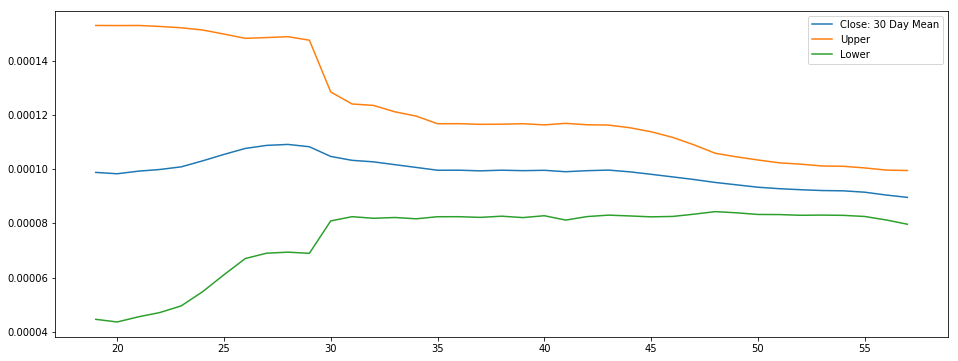

In [49]:
#modify
df['Close: 30 Day Mean'] = df['Close'].rolling(window=20).mean()
df['Upper'] = df['Close: 30 Day Mean'] + 2*df['Close'].rolling(window=20).std()
df['Lower'] = df['Close: 30 Day Mean'] - 2*df['Close'].rolling(window=20).std()
df[['Close','Close: 30 Day Mean','Upper','Lower']].plot(figsize=(16,6))